<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

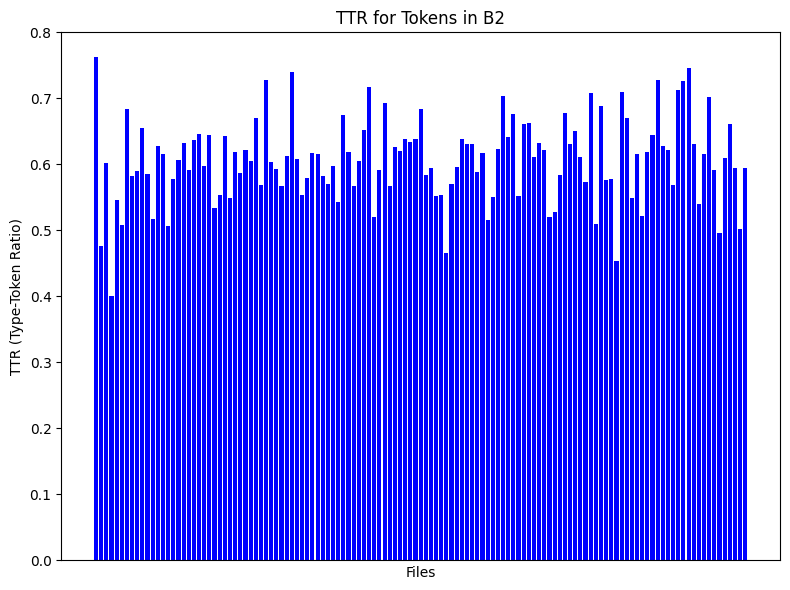

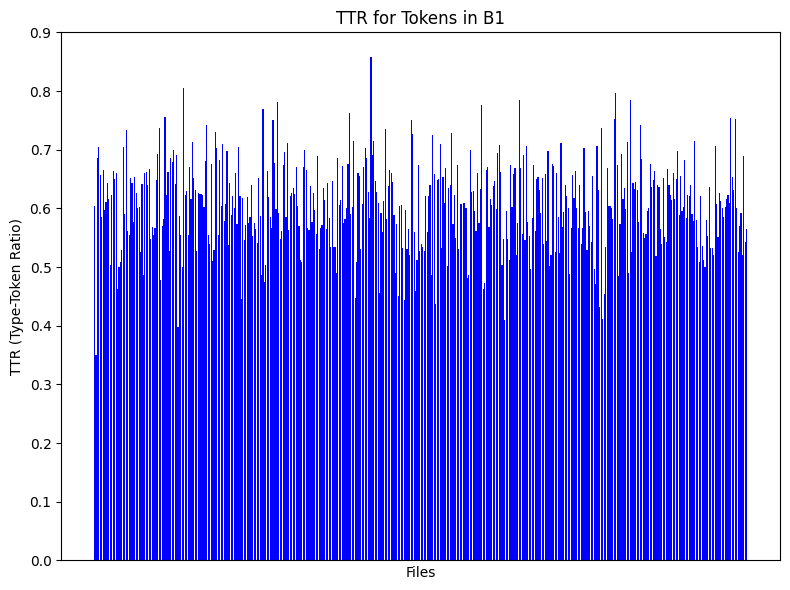

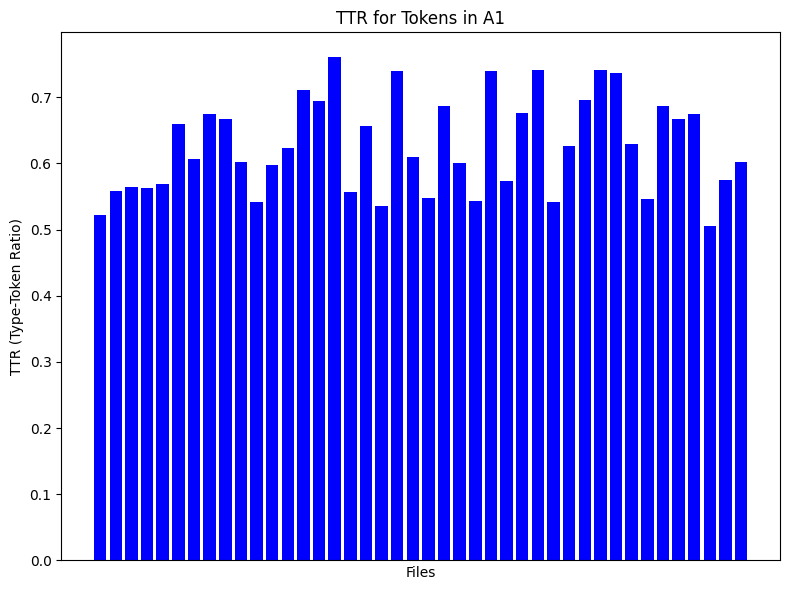

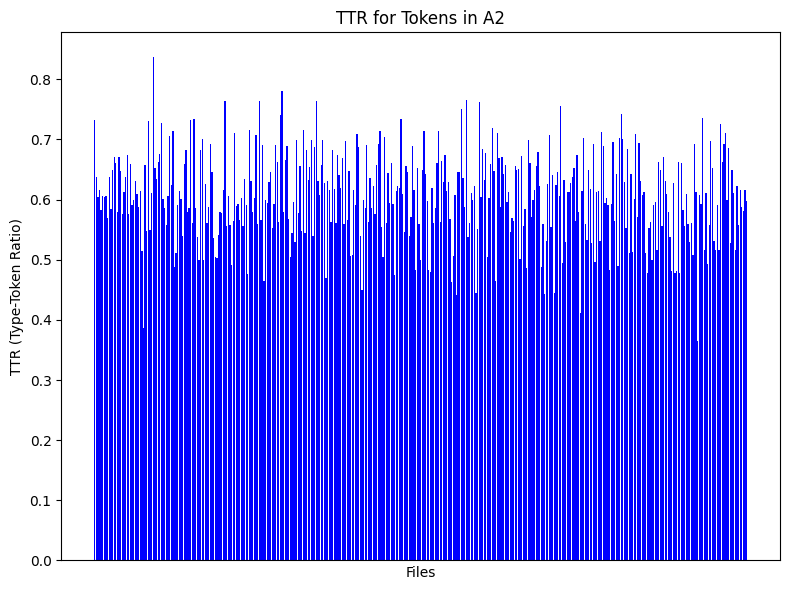

CEFR Level: B2, Avg TTR: 0.6068
CEFR Level: B1, Avg TTR: 0.6068
CEFR Level: A1, Avg TTR: 0.6273
CEFR Level: A2, Avg TTR: 0.6066


In [2]:
import os
import re
from collections import Counter
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\[unclear\]', '', text)
    return text

def calculate_ttr(tokens):
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    ttr = unique_tokens / total_tokens
    return ttr

def process_files(directory):
    ttr_data = {}
    for cefr_level in os.listdir(directory):
        cefr_dir = os.path.join(directory, cefr_level)
        if os.path.isdir(cefr_dir):
            ttr_values = []
            for filename in os.listdir(cefr_dir):
                if filename.endswith(".txt"):
                    filepath = os.path.join(cefr_dir, filename)
                    with open(filepath, "r", encoding="utf-8") as file:
                        text = file.read()
                        preprocessed_text = preprocess_text(text)
                        tokens = word_tokenize(preprocessed_text)

                        # Условие для минимальной длины в 50 токенов
                        if len(tokens) >= 50:
                            ttr = calculate_ttr(tokens)
                            ttr_values.append(ttr)
            if ttr_values:
                ttr_data[cefr_level] = ttr_values
    return ttr_data

def plot_ttr(ttr_data):
    for cefr_level, ttr_values in ttr_data.items():
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(ttr_values)), ttr_values, color='b')
        plt.xlabel('Files')
        plt.ylabel('TTR (Type-Token Ratio)')
        plt.title(f'TTR for Tokens in {cefr_level}')
        plt.xticks([])
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    directory_path = "/content/Students_texts"
    ttr_data = process_files(directory_path)
    plot_ttr(ttr_data)

    for cefr_level, ttr_values in ttr_data.items():
        avg_ttr = sum(ttr_values) / len(ttr_values)
        print(f"CEFR Level: {cefr_level}, Avg TTR: {avg_ttr:.4f}")